### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head() 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#df = data.drop('car', axis = 1)
df = data
df['Bar'] = data['Bar'].fillna('never')
df['CoffeeHouse'] = data['CoffeeHouse'].fillna('never')
df['CarryAway'] = data['CarryAway'].fillna('never')
df['Restaurant20To50'] = data['Restaurant20To50'].fillna('never')
df['RestaurantLessThan20'] = data['RestaurantLessThan20'].fillna('never')

4. What proportion of the total observations chose to accept the coupon?



In [6]:
df['Y'].mean()

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

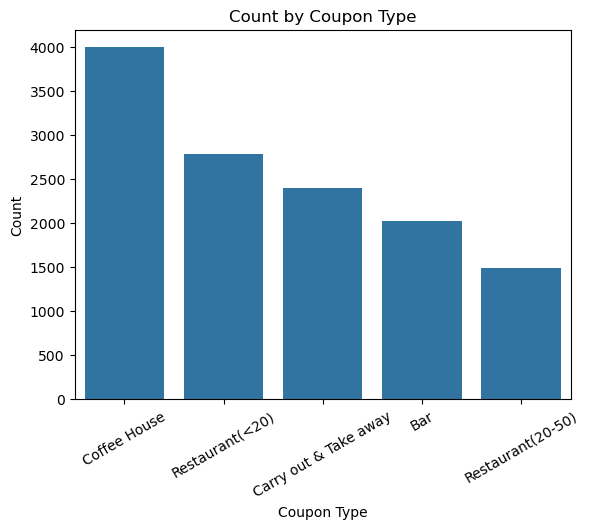

In [7]:
#df['coupon'].value_counts()
#Coffee House             3996
#Restaurant(<20)          2786
#Carry out & Take away    2393
#Bar                      2017
#Restaurant(20-50)        1492

counts = df['coupon'].value_counts().reset_index()
counts.columns = ['Coupon Type', 'Count']
sns.barplot(x='Coupon Type', y='Count', data=counts)
plt.xticks(rotation=30)
plt.title("Count by Coupon Type")
plt.show()

6. Use a histogram to visualize the temperature column.

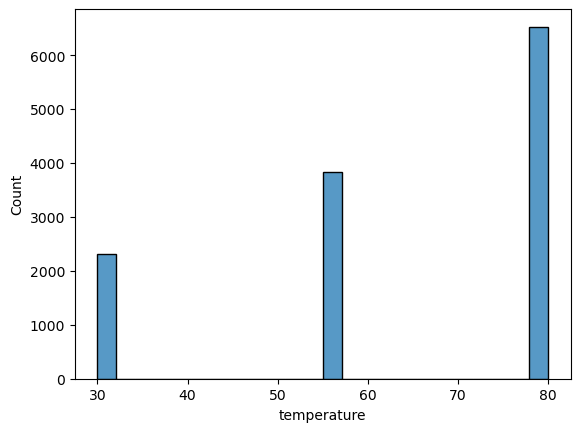

In [8]:
sns.histplot(data=df, x='temperature')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
df_bar = df.loc[(df['coupon']=='Bar') & (df["car"]!= "do not drive")]
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [10]:
df_bar['Y'].mean()

0.4094292803970223

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
#df_bar["Bar"].value_counts()
#Bar
#never    851
#less1    570
#1~3      397
#4~8      150
#gt8       49

lessthan3 = ["never", "less1", "1~3"]
morethan3 = ["4~8", "gt8"]
df_bar_lessthan3 = df_bar[df_bar["Bar"].isin(lessthan3)]
df_bar_morethan3 = df_bar[df_bar["Bar"].isin(morethan3)]
 
mean_lessthan3 = df_bar_lessthan3["Y"].mean()
mean_morethan3 = df_bar_morethan3["Y"].mean()
print (f"The acceptance rate for those who went to a bar 3 or fewer times is {mean_lessthan3}")
print (f"The acceptance rate for those who went to a bar more than 3 times is {mean_morethan3}") 


The acceptance rate for those who went to a bar 3 or fewer times is 0.37073707370737075
The acceptance rate for those who went to a bar more than 3 times is 0.766497461928934


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
lessthan1 = ["never", "less1"]
morethan1 = ["1~3", "4~8", "gt8"]

age_lte25 = ["21", "below21"]
age_gt25 = ["26", "31", "50plus", "36", "41", "46"]

condition = (
    df_bar["Bar"].isin(morethan1) &
    df_bar["age"].isin(age_gt25)
)

df_match = df_bar[condition]
df_nonmatch = df_bar[~condition]

mean_match = df_match["Y"].mean()
mean_nonmatch = df_nonmatch["Y"].mean()

print (f"The acceptance rate for those who went to a bar more than once and is >25yo is {mean_match}")
print (f"The acceptance rate for the others is {mean_nonmatch}")


The acceptance rate for those who went to a bar more than once and is >25yo is 0.69377990430622
The acceptance rate for the others is 0.33500313087038197


##### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:
pax_notkid = ["Alone", "Friend(s)", "Partner"]
pax_kid = ["Kid(s)"]

occ_fff = ["Farming Fishing & Forestry"]

condition2 = (
    df_bar["Bar"].isin(morethan1) &
    df_bar["passanger"].isin(pax_notkid) &
    ~df_bar["occupation"].isin(occ_fff)
)

df_match2 = df_bar[condition2]
df_nonmatch2 = df_bar[~condition2]

mean_match2 = df_match2["Y"].mean()
mean_nonmatch2 = df_nonmatch2["Y"].mean()

print (f"The acceptance rate for those who (a) were drivers, (b) go to bars more than once a month, \
        (c) had pax who were not a kid and (d) had occupations other than farming,fishing, or forestery is {mean_match2}")
print (f"The acceptance rate for the others is {mean_nonmatch2}")

The acceptance rate for those who (a) were drivers, (b) go to bars more than once a month,         (c) had pax who were not a kid and (d) had occupations other than farming,fishing, or forestery is 0.7122040072859745
The acceptance rate for the others is 0.296043656207367


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [14]:
marr_widowed = ["Widowed"]
under30 = ["21", "26", "below21"]
morethan4 = ["4~8", "gt8"]
lt50k = ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"]

condition3a = (
    df_bar["Bar"].isin(morethan1) &
    df_bar["passanger"].isin(pax_notkid) &
    ~df_bar["maritalStatus"].isin(marr_widowed)
)

condition3b = (
    df_bar["Bar"].isin(morethan1) &
    df_bar["age"].isin(under30) 
)

condition3c = (
    df_bar["RestaurantLessThan20"].isin(morethan4) &
    df_bar["income"].isin(lt50k) 
)

df_match3 = df_bar[condition3a | condition3b | condition3c]
df_nonmatch3 = df_bar[~(condition3a | condition3b | condition3c)]

mean_match3 = df_match3["Y"].mean()
mean_nonmatch3 = df_nonmatch3["Y"].mean()

print (f"The acceptance rate for those who matches the conditions is {mean_match3}")
print (f"The acceptance rate for the others is {mean_nonmatch3}")

The acceptance rate for those who matches the conditions is 0.5878552971576227
The acceptance rate for the others is 0.29814665592264306


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

To yield higher acceptance rates for bar coupons, one should consider: 

That the person is already a regular and goes to a bar >3 times a month 
That the person is of legal age and can go to a bar or 
That the person is not with a kid and had an occupation other than farming, fishing, or forestry. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# Filter for Restaurant(20-50) coupons and people who drive
df_expr = df.loc[(df['coupon']=='Restaurant(20-50)') & (df["car"]!= "do not drive")]
df_expr 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,never,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


In [ ]:
# Calculate acceptance rate for Restaurant(20-50) coupons amongst this group
df_expr["Y"].mean()

0.44018817204301075

In [ ]:
# Compare acceptance rate for those who go to expensive restaurants >=4 times/month
#df_expr["Restaurant20To50"].value_counts()
gte4 = ["4~8", "gt8"]

condition4a = df_expr["Restaurant20To50"].isin(gte4)

df_match4a = df_expr[condition4a]
df_nonmatch4a = df_expr[~condition4a]

mean_match4a = df_match4a["Y"].mean()
mean_nonmatch4a = df_nonmatch4a["Y"].mean()

print (f"The acceptance rate for match is {mean_match4a}")
print (f"The acceptance rate for the others is {mean_nonmatch4a}")

The acceptance rate for match is 0.6422764227642277
The acceptance rate for the others is 0.421978021978022


In [ ]:
# Compare acceptance rate for those with income >= $75,000
#df_expr["income"].value_counts()
mt75k = ["$100000 or More", "$75000 - $87499", "$87500 - $99999"]

condition4b = df_expr["income"].isin(mt75k)

df_match4b = df_expr[condition4b]
df_nonmatch4b = df_expr[~condition4b]

mean_match4b = df_match4b["Y"].mean()
mean_nonmatch4b = df_nonmatch4b["Y"].mean()

print (f"The acceptance rate for match is {mean_match4b}")
print (f"The acceptance rate for the others is {mean_nonmatch4b}")

The acceptance rate for match is 0.44680851063829785
The acceptance rate for the others is 0.4375586854460094


In [ ]:
# Compare acceptance rate for those over age 40
#df_expr["age"].value_counts()
mt40 = ["50plus", "41", "46"]

condition4c = df_expr["age"].isin(mt40)

df_match4c = df_expr[condition4c]
df_nonmatch4c = df_expr[~condition4c]

mean_match4c = df_match4c["Y"].mean()
mean_nonmatch4c = df_nonmatch4c["Y"].mean()

print (f"The acceptance rate for match is {mean_match4c}")
print (f"The acceptance rate for the others is {mean_nonmatch4c}")

The acceptance rate for match is 0.4113636363636364
The acceptance rate for the others is 0.45229007633587787


In [ ]:
# Compare acceptance rate for single drivers with a partner passenger
condition4d = (
    (df_expr["passanger"] == "Partner") &
    (df_expr["maritalStatus"] == "Single") 
)

df_match4d = df_expr[condition4d]
df_nonmatch4d = df_expr[~condition4d]

mean_match4d = df_match4d["Y"].mean()
mean_nonmatch4d = df_nonmatch4d["Y"].mean()

print (f"The acceptance rate for match is {mean_match4d}")
print (f"The acceptance rate for the others is {mean_nonmatch4d}")

The acceptance rate for match is 0.8888888888888888
The acceptance rate for the others is 0.4374577417173766


In [ ]:
# Compare acceptance rate for drivers with a partner passenger
condition4e = df_expr["passanger"] == "Partner"

df_match4e = df_expr[condition4e]
df_nonmatch4e = df_expr[~condition4e]

mean_match4e = df_match4e["Y"].mean()
mean_nonmatch4e = df_nonmatch4e["Y"].mean()

print (f"The acceptance rate for when person is driving with a Partner is {mean_match4e}")
print (f"The acceptance rate for others is {mean_nonmatch4e}")

The acceptance rate for when person is driving with a Partner is 0.6312056737588653
The acceptance rate for others is 0.4201930215293244


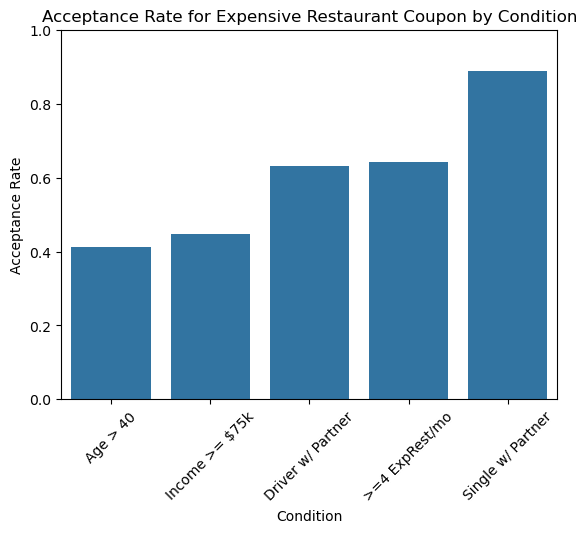

In [25]:
# Calculate acceptance rates for different conditions
conditions = {
    ">=4 ExpRest/mo": df_expr["Restaurant20To50"].isin(["4~8", "gt8"]),
    "Income >= $75k": df_expr["income"].isin(["$100000 or More", "$75000 - $87499", "$87500 - $99999"]),
    "Age > 40": df_expr["age"].isin(["50plus", "41", "46"]),
    "Driver w/ Partner": df_expr["passanger"] == "Partner",
    "Single w/ Partner": (df_expr["passanger"] == "Partner") & (df_expr["maritalStatus"] == "Single")
}

acceptance_rates = []
for label, cond in conditions.items():
    rate = df_expr[cond]["Y"].mean()
    acceptance_rates.append({"Condition": label, "Acceptance Rate": rate})

cond_df = pd.DataFrame(acceptance_rates)
cond_df = cond_df.sort_values("Acceptance Rate")  # Sort by increasing acceptance rate

sns.barplot(x="Condition", y="Acceptance Rate", data=cond_df)
plt.title("Acceptance Rate for Expensive Restaurant Coupon by Condition")
plt.ylabel("Acceptance Rate")
plt.xlabel("Condition")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

### Analysis Summary (Independent Investigation)

The data suggests that success rate might be high for expensive restaurant coupons in cases when either, the person is already a regular patron of expensive restaurants, or if they were with a Partner in the car. 

### Next Steps and Recommendation 

The data suggests that regardless of coupon types, regulars tend to accept the offered coupon type of restaurant types they frequent, and thus having such datapoint would allow one to more targettedly distribute such coupons. This is also why it makes most sense to simply distribute the coupons at the restaurants/cafes itself at the point of purchase/payment. 